In [1]:
# nucleo escrito em python/numpy
import Weibull as pwb
# nucleo escrito em C
import weibull.weibull_C as cwb

import numpy as np
from timeit import default_timer

***
## <span style="color:red"> Testando as minha funções que calcula b e c
***
    
Objetivo é comparar o tempo de execução da função get_b_c implementada em diferentes linguagens. O módulo Weibull foi implementado em python/numpy. O módulo weibull.weibull_C chama um funcção escrita em C.

## Parametros do teste

$\mu_w$    : media da weibull

$\sigma_w$ : desvio padrao da weibull

$N_a$      : Numero de amostras

In [2]:
mu         = 360.98 # media
sig        = 15.55  # desvio padrão
n_amostras = 500    # numero de amostras

maxIt= 100000 

## Bibiloteca escrita em python

In [3]:
tempo_py = list()
j=0
for i in range(n_amostras):

    start_time = default_timer()
    _, _, _ = pwb.get_b_c(mu, sig, maxIt= maxIt, tol = 1e-15, alf=1.0, ver = False)
    t = default_timer() - start_time
        
    tempo_py.append(t)
    # ...
    j+=1
    if(j == 5):
      j = 0
      print(f'\rTotal de experimentos [{(i+1)/n_amostras*100:.2f}]%', end='')
    # ........................................................... 
    
    media_py = np.mean(tempo_py)
    desvio_py= np.std(tempo_py)
    
print(f'\n{media_py} +- {desvio_py} s')

Total de experimentos [100.00]%
3.347839886237999 +- 0.19517252568865706 s


In [4]:
b_hcca, c_hcca, it = pwb.get_b_c(mu, sig, maxIt= maxIt, tol = 1e-15, alf=1.0, ver = False)
print(f"Iter = {it}\nb = {b_hcca:.3f}\nc = {c_hcca:.3f}")

Iter = 100000
b = 29.068
c = 367.867


### Erro nas medidas

In [5]:
res_mu  =  np.sqrt((mu - pwb.media(b_hcca, c_hcca))**2)
res_sig =  np.sqrt((sig - pwb.sig(b_hcca, c_hcca))**2)
print(f'|res_mu|  = {res_mu:.3e}\n|res_sig| = {res_sig:.3e}')

|res_mu|  = 1.137e-13
|res_sig| = 2.172e-12


## Bibiloteca escrita em C

In [6]:
lib = cwb.Weibull_C()

In [7]:
tempo_C = list()
for i in range(n_amostras):
    
    start_time = default_timer()
    _, _, _ = lib.weibul_get_b_c(mu, sig, tol = 1.0e-15, max_iter=maxIt, alf=1.0)
    t = default_timer() - start_time
    
    tempo_C.append(t)
    # ...
    j+=1
    if(j == 5):
      j = 0
      print(f'\rTotal de experimentos [{(i+1)/n_amostras*100:.2f}]%', end='')
    # ...........................................................     
    media_c = np.mean(tempo_C)
    desvio_c= np.std(tempo_C)
    
print(f'\n{media_c} +- {desvio_c} s')

Total de experimentos [100.00]%
0.013201037115997225 +- 0.0016423597885840118 s


In [8]:
b_hcca, c_hcca, it = lib.weibul_get_b_c(mu, sig, tol = 1.0e-15, max_iter=maxIt, alf=1.0)
print(f"Iter = {it}\nb = {b_hcca:.3f}\nc = {c_hcca:.3f}")

Iter = 100000
b = 29.068
c = 367.867


### Erro nas medidas

In [9]:
res_mu  =  np.sqrt((mu - lib.media(b_hcca, c_hcca))**2)
res_sig =  np.sqrt((sig - lib.std(b_hcca, c_hcca))**2)
print(f'|res_mu|  = {res_mu:.3e}\n|res_sig| = {res_sig:.3e}')

|res_mu|  = 0.000e+00
|res_sig| = 3.002e-13


***
# <span style="color:red"> Plotando o erros
***
    
$\mu$    : média dos tempos

$\sigma$ : desvio padrão dos tempos

In [10]:
import matplotlib.pyplot as plt

Tempo médio
LibC  : (0.0132 +- 0.0016) s
Python: (3.3478 +- 0.1952) s


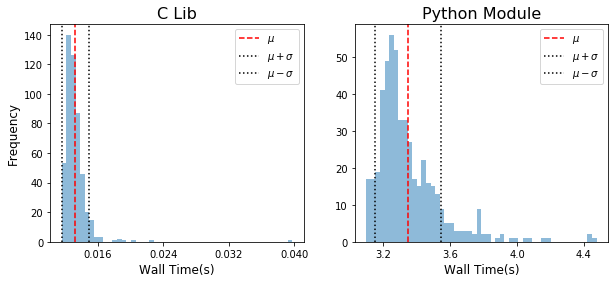

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

ax1.hist(tempo_C, bins=50, density=False, alpha = 0.5)
ax2.hist(tempo_py, bins=50, density=False, alpha = 0.5)

ax1.set_title('C Lib',fontsize=16)
ax2.set_title('Python Module',fontsize=16)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Wall Time(s)',fontsize=12)
ax2.set_xlabel('Wall Time(s)',fontsize=12)

# numeros de divisos em x
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

# linha da media
ax1.axvline(media_c, color = 'r', ls='--', label=r'$\mu$')
ax2.axvline(media_py, color = 'r', ls='--', label=r'$\mu$')

# desvio padrao
ax1.axvline(media_c + desvio_c, color = 'black', ls=':', label=r'$\mu + \sigma$')
ax1.axvline(media_c - desvio_c, color = 'black', ls=':', label=r'$\mu - \sigma$')

# desvio padrao
ax2.axvline(media_py + desvio_py, color = 'black', ls=':', label=r'$\mu + \sigma$')
ax2.axvline(media_py - desvio_py, color = 'black', ls=':', label=r'$\mu - \sigma$')

ax1.legend()
ax2.legend()

print(f'Tempo médio')
print(f'LibC  : ({media_c:.4f} +- {desvio_c:.4f}) s')
print(f'Python: ({media_py:.4f} +- {desvio_py:.4f}) s')